In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from sklearn.gaussian_process \
    import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, ConstantKernel as C

x_train = np.arange(0, 1.1, 0.2)
x_valid = np.linspace(0, 1, 101)
y_train = np.sin(2 * np.pi * x_train)
y_valid = np.sin(2 * np.pi * x_valid)

kernel = C(1) * RBF(length_scale=0.2)
gp = GaussianProcessRegressor(kernel)
gp.fit(x_train[:, None], y_train)
y_pred, y_stdv = gp.predict(
    x_valid[:, None], return_std=True)

In [3]:
import matplotlib.pyplot as plt
from emulate.graphs import PRED_KWARGS, setup_rc_params

In [4]:
setup_rc_params()

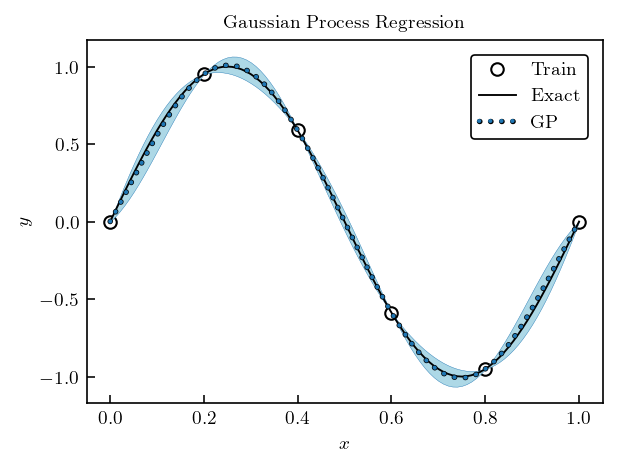

In [5]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(
    x_train, y_train, ls='', marker='o',
    markerfacecolor='none', markeredgecolor='k', c='k', zorder=0, lw=1, label='Train')
ax.plot(x_valid, y_valid, c='k', lw=0.9, zorder=1, label='Exact')
ax.plot(x_valid, y_pred, label='GP', **PRED_KWARGS)
ax.fill_between(x_valid, y_pred-2*y_stdv, y_pred+2*y_stdv, facecolor='lightblue', edgecolor='C0', linewidth=0.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("Gaussian Process Regression")
ax.legend()
fig.savefig("gp_regression_example.png")